In [ ]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # (For econometrics approach we use statsmodels package)

sns.set()

In [ ]:
# Part 1

df = pd.read_csv('/content/nyc-rolling-sales_clean.csv')

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         30236 non-null  object 
 1   NEIGHBORHOOD                    30236 non-null  object 
 2   BUILDING CLASS CATEGORY         30236 non-null  object 
 3   TAX CLASS AT PRESENT            30236 non-null  object 
 4   BUILDING CLASS AT PRESENT       30236 non-null  object 
 5   ZIP CODE                        30236 non-null  int64  
 6   RESIDENTIAL UNITS               30236 non-null  int64  
 7   COMMERCIAL UNITS                30236 non-null  int64  
 8   TOTAL UNITS                     30236 non-null  int64  
 9   LAND SQUARE FEET                30236 non-null  float64
 10  GROSS SQUARE FEET               30236 non-null  float64
 11  YEAR BUILT                      30236 non-null  int64  
 12  TAX CLASS AT TIME OF SALE       

In [ ]:
# constructing the date time variable

df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [ ]:
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,2432
2,0,2323
3,0,2782
4,0,2344
5,0,2565
6,0,2931
7,0,2328
8,0,1937
9,2807,0


In [ ]:
# constructing the numerical variables:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce') # coercing errors to NAs

In [ ]:
# constructing the categorical variables:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical:
    df[col] = df[col].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BUILDING CLASS AT PRESENT       30236 non-null  category      
 5   ZIP CODE                        30236 non-null  category      
 6   RESIDENTIAL UNITS               30236 non-null  int64         
 7   COMMERCIAL UNITS                30236 non-null  int64         
 8   TOTAL UNITS                     30236 non-null  int64         
 9   LAND SQUARE FEET                30236 non-null  float64       
 10  GROSS SQUARE FEET               30236 non-null  float64       
 11  YE

In [ ]:
df.isna().sum()

,0
BOROUGH,0
NEIGHBORHOOD,0
BUILDING CLASS CATEGORY,0
TAX CLASS AT PRESENT,0
BUILDING CLASS AT PRESENT,0
ZIP CODE,0
RESIDENTIAL UNITS,0
COMMERCIAL UNITS,0
TOTAL UNITS,0
LAND SQUARE FEET,0


In [ ]:
# Define the target variable
df['target'] = np.log(df['SALE PRICE'])

# We can drop the 'SALE PRICE' column as it is now represented by the 'target' variable
# Keeping both would cause multicollinearity, and target leakage
# It would also potentially lead to overfitting

df = df.drop('SALE PRICE', axis=1)


In [ ]:
# Define the feature space (X)
X = df[['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
        'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
        'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
        'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'sale_year', 'sale_month']]


In [ ]:
# I have 845 features from this.
X = pd.get_dummies(df, drop_first=True, dtype=int)
print(X.shape[1])


845


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'y' is your target variable (e.g., df['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_hat_test = model.predict(X_test)

# Create a DataFrame with y_test, y_hat_test, and residuals
log_predictions = pd.DataFrame({'y_test': y_test, 'y_hat_test': y_hat_test, 'resid': y_test - y_hat_test})

# Calculate RMSE
rmse_test = math.sqrt(mean_squared_error(y_test, y_hat_test))

print(f"RMSE_test: {rmse_test}")



RMSE_test: 0.5385909633230231


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Initialize the model
model = LinearRegression()

# Define the number of folds for cross-validation
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate RMSE for K=5
cv_scores_5 = cross_val_score(model, X, y, cv=kf5, scoring='neg_mean_squared_error')
rmse_cv5 = np.sqrt(-cv_scores_5.mean())

# Perform cross-validation and calculate RMSE for K=10
cv_scores_10 = cross_val_score(model, X, y, cv=kf10, scoring='neg_mean_squared_error')
rmse_cv10 = np.sqrt(-cv_scores_10.mean())

print(f"RMSE_CV5: {rmse_cv5}")
print(f"RMSE_CV10: {rmse_cv10}")


RMSE_CV5: 1.149536467840541
RMSE_CV10: 0.682076011743927


In [ ]:
# Part 2

df_poly = pd.read_csv('/content/boston_polynomial.csv')

df_poly.head()

,price,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33


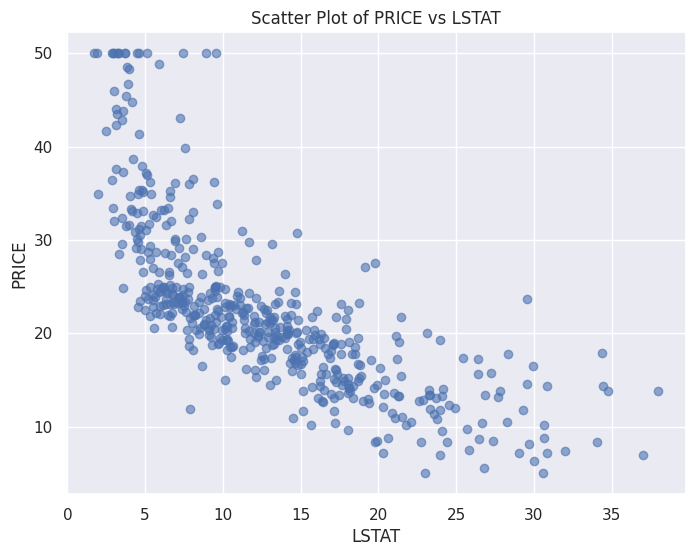

In [ ]:
# Creating the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df_poly['LSTAT'], df_poly['price'], alpha=0.6)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('Scatter Plot of PRICE vs LSTAT')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(df_poly[['LSTAT']])


In [ ]:
# Splitting the data into train and test
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, df_poly['price'], test_size=0.3, random_state=42)


In [ ]:
# Initialize the model
model_poly = LinearRegression()

# Fit the model to the training data
model_poly.fit(X_train_poly, y_train_poly)

# Predict on the test set
y_hat_test_poly = model_poly.predict(X_test_poly)

# Create a DataFrame with y_test, y_hat_test, and residuals
predictions = pd.DataFrame({'y_test': y_test_poly, 'y_hat_test': y_hat_test_poly, 'resid': y_test_poly - y_hat_test_poly})

# Calculate RMSE
rmse_test_poly = math.sqrt(mean_squared_error(y_test_poly, y_hat_test_poly))

print(f"RMSE_test: {rmse_test_poly}")


RMSE_test: 5.247504549582216


In [ ]:
# Initialize the model
model_poly = LinearRegression()

# Define the number of folds for cross-validation
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate RMSE for K=5
cv_scores_5 = cross_val_score(model_poly, X_poly, df_poly['price'], cv=kf5, scoring='neg_mean_squared_error')
rmse_cv5 = np.sqrt(-cv_scores_5.mean())

print(f"RMSE_CV5: {rmse_cv5}")


RMSE_CV5: 5.2316817760305305


In [ ]:
def my_polynomial_regression(X, y, degree):
  """
  Performs polynomial regression with a specified degree and returns RMSE for training and test sets.

  Args:
    X: Feature matrix (independent variables).
    y: Target variable (dependent variable).
    degree: The degree of the polynomial features.

  Returns:
    A tuple containing the RMSE for the training set and the test set.
  """

  # Create polynomial features
  poly = PolynomialFeatures(degree=degree)
  X_poly = poly.fit_transform(X)

  # Split the data into training and testing sets
  X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
      X_poly, y, test_size=0.3, random_state=42
  )

  # Initialize the linear regression model
  model_poly = LinearRegression()

  # Fit the model to the training data
  model_poly.fit(X_train_poly, y_train_poly)

  # Make predictions on the training and testing sets
  y_hat_train_poly = model_poly.predict(X_train_poly)
  y_hat_test_poly = model_poly.predict(X_test_poly)

  # Calculate RMSE for training and testing sets
  rmse_train_poly = math.sqrt(mean_squared_error(y_train_poly, y_hat_train_poly))
  rmse_test_poly = math.sqrt(mean_squared_error(y_test_poly, y_hat_test_poly))

  return rmse_train_poly, rmse_test_poly


# Create an empty list to store the results
results = []

# Iterate through degrees from 1 to 10
for degree in range(1, 11):
  rmse_train, rmse_test = my_polynomial_regression(df_poly[['LSTAT']], df_poly['price'], degree)
  results.append([degree, rmse_train, rmse_test])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Degree', 'RMSE_train', 'RMSE_test'])

# Print the table
print(results_df)


   Degree  RMSE_train  RMSE_test
0       1    6.231811   6.172415
1       2    5.473084   5.619570
2       3    5.370038   5.419421
3       4    5.242526   5.318401
4       5    5.175000   5.247505
5       6    5.173172   5.231565
6       7    5.157730   5.287791
7       8    5.147518   5.279236
8       9    5.146052   5.253052
9      10    5.148634   5.313781


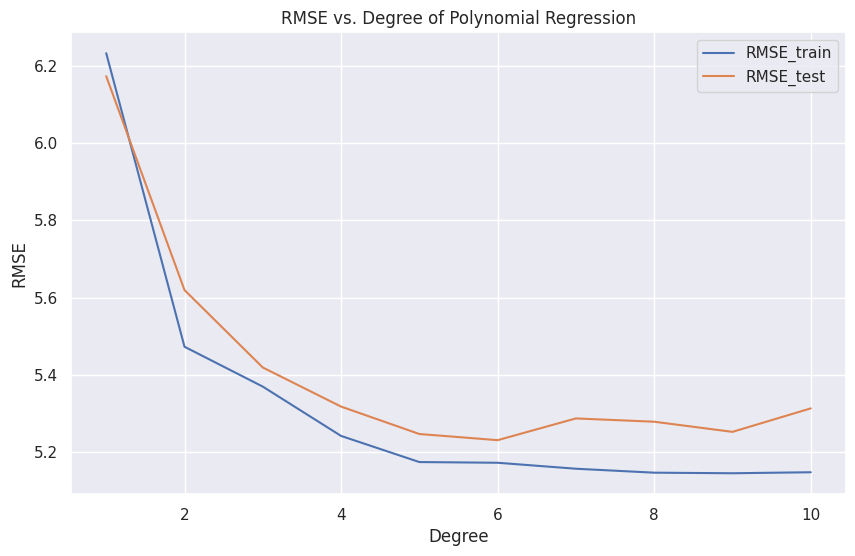

In [ ]:
# Plotting the graph using the table
plt.figure(figsize=(10, 6))
plt.plot(results_df['Degree'], results_df['RMSE_train'], label='RMSE_train')
plt.plot(results_df['Degree'], results_df['RMSE_test'], label='RMSE_test')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs. Degree of Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Based on the table and chart, the optimal polynomial degree appears to be 2 or 3.

# Explanation:

# 1. Decreasing RMSE_test: Initially, as the polynomial degree increases,
#    the RMSE_test decreases, indicating a better fit to the test data.
# 2. Overfitting: However, beyond degree 3, RMSE_test starts to increase again.
#    This suggests that the model is overfitting the training data, and it
#    does not generalize well to new, unseen data.
# 3. Balance: Therefore, a polynomial degree of 2 or 3 provides a good balance
#    between fitting the data well and avoiding overfitting. At these degrees,
#    the RMSE_test remains relatively low and stable.

# In conclusion, degrees 2 or 3 are considered the optimal polynomial degree for
# this dataset, as they achieve a good fit without overly complexifying the model
# and leading to overfitting.
